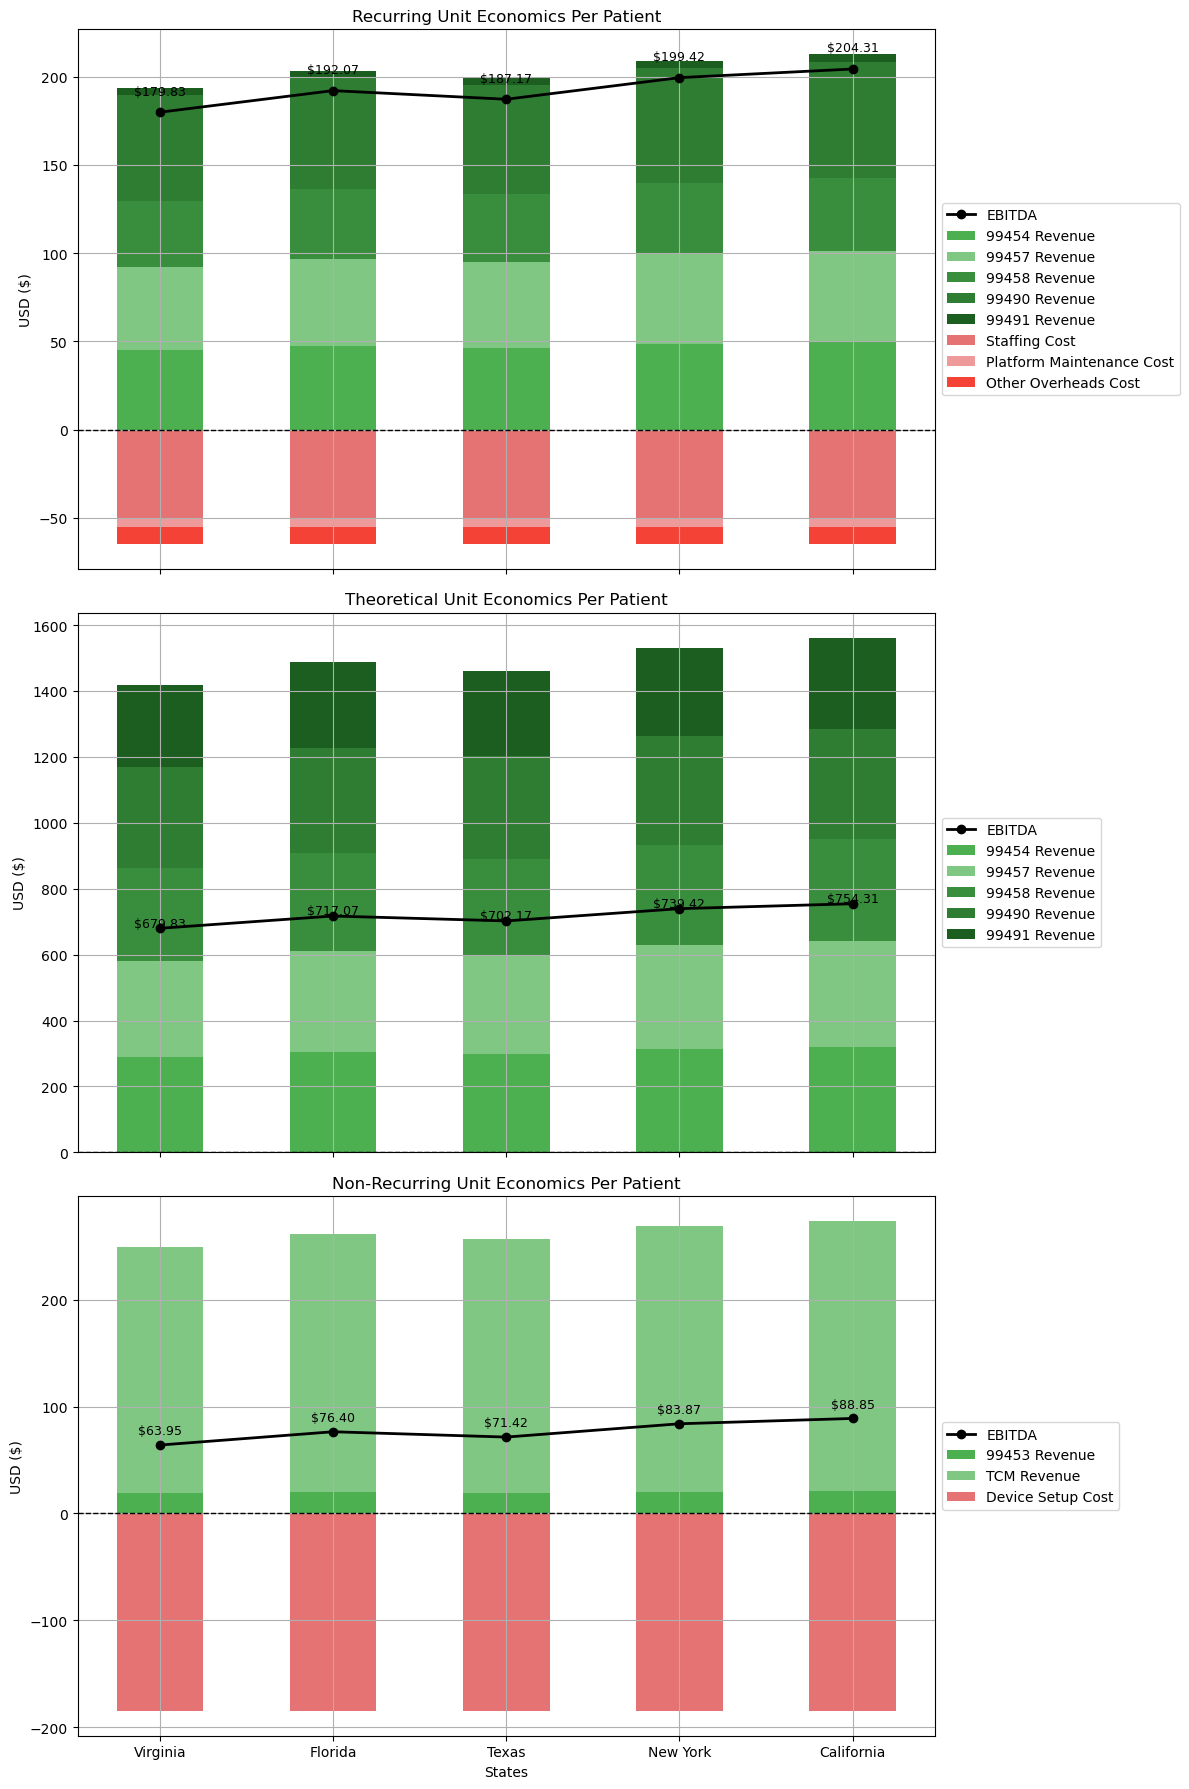

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Define the states
states = ["Virginia", "Florida", "Texas", "New York", "California"]

# Define GPCI adjustments
gpci_adjustments = {
    "Virginia": 1.0,
    "Florida": 1.05,
    "Texas": 1.03,
    "New York": 1.08,
    "California": 1.1
}

# Recurring billing codes revenue
recurring_revenue_per_patient = {
    "99454": 45.12,  # RPM Device Supply
    "99457": 46.85,  # RPM Management (1st 20 mins)
    "99458": 37.62,  # Additional RPM Management
    "99490": 59.90,  # CCM by Clinical Staff
    "99491": 80.98 / 20,  # CCM by Physician (1 in 20 patients)
    "99091": 51.29  # Data Interpretation
}

# Theoretical billing codes revenue
theoretical_revenue_per_patient = {
    **recurring_revenue_per_patient,  # Existing codes
    "Alzheimer's Monitoring": 180.00,
    "Mental Health Support": 120.00,
    "Preventive Care": 200.00
}

# Non-recurring revenue per patient (one-time)
non_recurring_revenue_per_patient = {
    "99453": 18.95,  # RPM Setup
    "TCM": 230.00  # Transitional Care Management
}

# Recurring costs per patient
recurring_costs_per_patient = {
    "Staffing": 50.00,  # Staff allocation per patient
    "Platform Maintenance": 5.00,  # Reduced cost for in-house platform
    "Other Overheads": 10.00
}

# Non-recurring costs per patient
non_recurring_costs_per_patient = {
    "Device Setup": 185.00  # Hardware and setup cost
}

# Calculate recurring EBITDA
recurring_ebitda_per_patient = {
    state: sum(recurring_revenue_per_patient.values()) * gpci -
           sum(recurring_costs_per_patient.values())
    for state, gpci in gpci_adjustments.items()
}

# Calculate theoretical EBITDA
theoretical_ebitda_per_patient = {
    state: sum(theoretical_revenue_per_patient.values()) * gpci -
           sum(recurring_costs_per_patient.values())
    for state, gpci in gpci_adjustments.items()
}

# Prepare data for visualization
x = np.arange(len(states))
width = 0.5
colors = {
    "revenue": ["#4caf50", "#81c784", "#388e3c", "#2e7d32", "#1b5e20"],
    "costs": ["#e57373", "#ef9a9a", "#f44336", "#d32f2f", "#b71c1c"],
    "ebitda": "black"
}

# Plotting
fig, ax = plt.subplots(3, 1, figsize=(12, 18), sharex=True)

# Recurring Unit Economics
for i, (key, color) in enumerate(zip(recurring_revenue_per_patient.keys(), colors["revenue"])):
    ax[0].bar(
        x,
        [gpci_adjustments[state] * recurring_revenue_per_patient[key] for state in states],
        width,
        bottom=np.sum(
            [[gpci_adjustments[state] * recurring_revenue_per_patient[prev_key] for state in states]
             for prev_key in list(recurring_revenue_per_patient.keys())[:i]],
            axis=0
        ),
        label=f"{key} Revenue",
        color=color
    )

for i, (key, color) in enumerate(zip(recurring_costs_per_patient.keys(), colors["costs"])):
    ax[0].bar(
        x,
        [-recurring_costs_per_patient[key] for _ in states],
        width,
        bottom=-np.sum(
            [[recurring_costs_per_patient[prev_key] for _ in states]
             for prev_key in list(recurring_costs_per_patient.keys())[:i]],
            axis=0
        ),
        label=f"{key} Cost",
        color=color
    )

ax[0].plot(
    x,
    list(recurring_ebitda_per_patient.values()),
    label="EBITDA",
    color=colors["ebitda"],
    marker="o",
    linewidth=2
)

for i, ebitda in enumerate(recurring_ebitda_per_patient.values()):
    ax[0].text(i, ebitda + 10, f"${ebitda:.2f}", color=colors["ebitda"], ha="center", fontsize=9)

# Theoretical Revenue Bar Chart: Combine Recurring and Theoretical
for i, (key, color) in enumerate(zip(theoretical_revenue_per_patient.keys(), colors["revenue"])):
    ax[1].bar(
        x,
        [
            gpci_adjustments[state] * (theoretical_revenue_per_patient[key] + sum(recurring_revenue_per_patient.values()))
            for state in states
        ],
        width,
        bottom=np.sum(
            [
                [
                    gpci_adjustments[state] * (theoretical_revenue_per_patient[prev_key] + sum(recurring_revenue_per_patient.values()))
                    for state in states
                ]
                for prev_key in list(theoretical_revenue_per_patient.keys())[:i]
            ],
            axis=0
        ),
        label=f"{key} Revenue",
        color=color
    )
# Plot Theoretical EBITDA Line
ax[1].plot(
    x,
    list(theoretical_ebitda_per_patient.values()),
    label="EBITDA",
    color=colors["ebitda"],
    marker="o",
    linewidth=2
)

# Annotations for Theoretical EBITDA
for i, ebitda in enumerate(theoretical_ebitda_per_patient.values()):
    ax[1].text(i, ebitda + 5, f"${ebitda:.2f}", color=colors["ebitda"], ha="center", fontsize=9)

ax[1].set_title("Theoretical Unit Economics Per Patient")


# Non-Recurring Unit Economics
for i, (key, color) in enumerate(zip(non_recurring_revenue_per_patient.keys(), colors["revenue"])):
    ax[2].bar(
        x,
        [gpci_adjustments[state] * non_recurring_revenue_per_patient[key] for state in states],
        width,
        bottom=np.sum(
            [[gpci_adjustments[state] * non_recurring_revenue_per_patient[prev_key] for state in states]
             for prev_key in list(non_recurring_revenue_per_patient.keys())[:i]],
            axis=0
        ),
        label=f"{key} Revenue",
        color=color
    )

for i, (key, color) in enumerate(zip(non_recurring_costs_per_patient.keys(), colors["costs"])):
    ax[2].bar(
        x,
        [-non_recurring_costs_per_patient[key] for _ in states],
        width,
        bottom=-np.sum(
            [[non_recurring_costs_per_patient[prev_key] for _ in states]
             for prev_key in list(non_recurring_costs_per_patient.keys())[:i]],
            axis=0
        ),
        label=f"{key} Cost",
        color=color
    )

# Plot Non-Recurring EBITDA Line
ax[2].plot(
    x,
    list(non_recurring_ebitda_per_patient.values()),
    label="EBITDA",
    color=colors["ebitda"],
    marker="o",
    linewidth=2
)

# Annotations for Non-Recurring EBITDA
for i, ebitda in enumerate(non_recurring_ebitda_per_patient.values()):
    ax[2].text(i, ebitda + 10, f"${ebitda:.2f}", color=colors["ebitda"], ha="center", fontsize=9)


ax[2].set_title("Non-Recurring Unit Economics Per Patient")

ax[1].set_title("Theoretical Unit Economics Per Patient")

# Formatting
for i, axis in enumerate(ax):
    axis.axhline(0, color="black", linestyle="--", linewidth=1)
    axis.set_ylabel("USD ($)")
    axis.legend(loc="center left", bbox_to_anchor=(1, 0.5))
    axis.grid(True)

ax[0].set_title("Recurring Unit Economics Per Patient")
ax[1].set_title("Theoretical Unit Economics Per Patient")
ax[2].set_title("Non-Recurring Unit Economics Per Patient")
ax[2].set_xticks(x)
ax[2].set_xticklabels(states)
ax[2].set_xlabel("States")

plt.tight_layout()
plt.savefig("unit_economics_full.pdf")
plt.show()
